PHASE THREE: Discovering Pandemics within the United States and Worldwide

    Objective: Identify pandemics by analyzing the centrally located headlines in the largest clusters of headlines. Look at the prevalence of disease in each cluster. Any disease outbreaks in the United States or around the world will be reported back to superiors at the WHO to direct help where it’s needed.

Workflow:

Step one

    Import necessary modules

In [1]:
from math import radians, cos, sin, asin, sqrt

import os
from enum import Enum
from hashlib import sha256
from math import radians, cos, sin, asin, sqrt

import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import KMeans

Step Two

    Define some global constants and enum

In [2]:
fig_size = (16, 9)
color_list = ["r", "y", "g", "c", "b", "m", "k", "chocolate", "darkorange", "lime", "navy", "deeppink"]
word_sep = "_"
long_postfix = word_sep + "long"
lat_postfix = word_sep + "lat"
cluster_prefix = 'Cluster' + word_sep
long_str = "longitude"
lat_str = "latitude"
kmlb_str = 'kmeans_label'
log_lat_col_name = [long_str, lat_str]
data_path = "database"
seed = int(sha256("discovering disease outbreaks from news headlines".encode("utf-8")).hexdigest(),
           base=16) & 0xffffffff


class Scope(Enum):
    world = 0
    US = 1

Step Three

    Define a function to plot elbow curve to find the optimal amount of clusters for kmeans algorithm

In [3]:
def elbow_curve(new_df):
    cluster_range = range(1, 21)
    score = [KMeans(n_clusters=i).fit(new_df).score(new_df) for i in cluster_range]
    plt.plot(cluster_range, score, "x-")
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()

Step Four 

    Define a function to implement the k-means algorithm to check that the clusters aren't overlapping
    Note that the input_df contains two columns the first column represents the longitude, the second column represents the latitude

In [4]:
def kmeans_label_calcu(input_df, num_cluster, scope):
    if (scope == Scope.US):
        map_plotter = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49,
                              lat_1=33, lat_2=45)
    else:
        map_plotter = Basemap()
    kmeans_model = KMeans(n_clusters=num_cluster, random_state=seed).fit(input_df)
    centroids = kmeans_model.cluster_centers_
    # print(f"{centroids=}")
    map_plotter.scatter(input_df[long_str], input_df[lat_str], c=kmeans_model.labels_.astype(float), s=50, alpha=0.5)
    map_plotter.shadedrelief()
    plt.plot(centroids[:, 0], centroids[:, 1], 'rx')
    plt.show()
    return kmeans_model.labels_

Step Five

    Define a function to plot the clusters on a geographical map

In [5]:
def plot_clusters(input_df, num_cluster, scope, fig_title):
    if (scope == Scope.US):
        map_plotter = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49,
                              lat_1=33, lat_2=45)
    else:
        map_plotter = Basemap()
    fig = plt.figure(figsize=fig_size)
    cluster_vals = {}

    for i in range(num_cluster):
        cluster_vals[str(i) + long_postfix] = []
        cluster_vals[str(i) + lat_postfix] = []
    for index in input_df.index:
        cluster_vals[str(input_df[kmlb_str][index]) + long_postfix].append(input_df[long_str][index])
        cluster_vals[str(input_df[kmlb_str][index]) + lat_postfix].append(input_df[lat_str][index])
    for index in range(num_cluster):
        map_plotter.scatter(cluster_vals[str(index) + long_postfix], cluster_vals[str(index) + lat_postfix],
                            latlon=True, c=color_list[index], alpha=0.6, label=f"cluster {index}")
        map_plotter.shadedrelief()
    plt.title(fig_title)
    plt.legend()
    fig.savefig(f"{data_path}\\{fig_title}.png", dpi=800)
    plt.show()

Step Six

    Defining the distance function (Great Circle Distance)

In [6]:
def haversine(point_a, point_b):
    lon1, lat1, lon2, lat2 = map(radians, [point_a[0], point_a[1], point_b[0], point_b[1]])
    a = sin((lat2 - lat1) / 2) ** 2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2) ** 2
    return 12742 * asin(sqrt(a))

Step Seven

    Creating a function to find the entries whose headline include a particular key word

In [7]:
def search_dataframe(df, word):
    res_dict = {'headline': [], long_str: [], lat_str: [], kmlb_str: []}
    for index in df.index:
        if (df['headline'][index].find(word.lower()) != -1 or df['headline'][index].find(word.capitalize()) != -1):
            res_dict['headline'].append(df['headline'][index])
            res_dict[long_str].append(df[long_str][index])
            res_dict[lat_str].append(df[lat_str][index])
            res_dict[kmlb_str].append(df[kmlb_str][index])
    res_df = pd.DataFrame(data=res_dict)
    return res_df

Step Eight

    main function

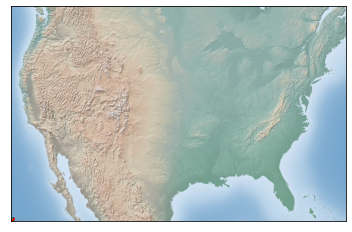

C:\Users\Brant Fang\AppData\Local\Temp\ipykernel_16296\3514633914.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us[kmlb_str] = kmeans_label_calcu(df_us[log_lat_col_name], num_us_cluster, Scope.US)


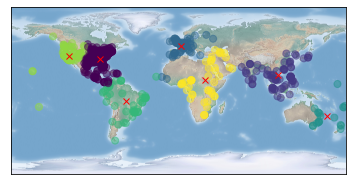

C:\Users\Brant Fang\AppData\Local\Temp\ipykernel_16296\3514633914.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us["distance"] = [haversine([df_us.loc[index, long_str], df_us.loc[index, lat_str]],


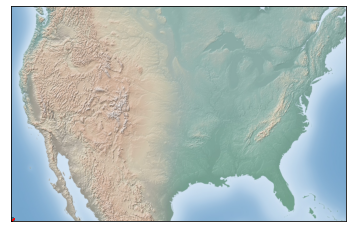

              count   longitude   latitude
kmeans_label                              
1                39  -81.272184  27.255397
2                25  -97.439077  31.116118
0                15 -118.117019  37.390889
3                 9  -78.222014  40.305982
4                 6  -88.759525  40.500402


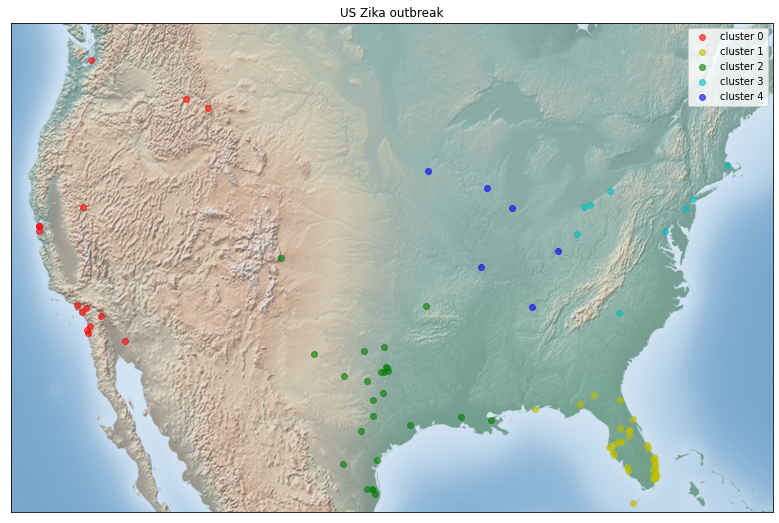

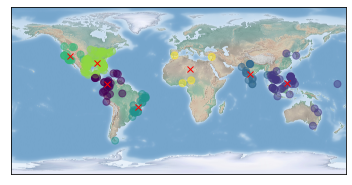

              count   longitude   latitude
kmeans_label                              
5                91  -87.219237  29.645764
1                43  116.712554   8.553177
0                28  -76.406913   6.939512
3                20  -43.290654 -17.761750
4                18 -116.327015  36.994604
2                13   77.821767  18.225132
6                 4   12.823853  23.242427


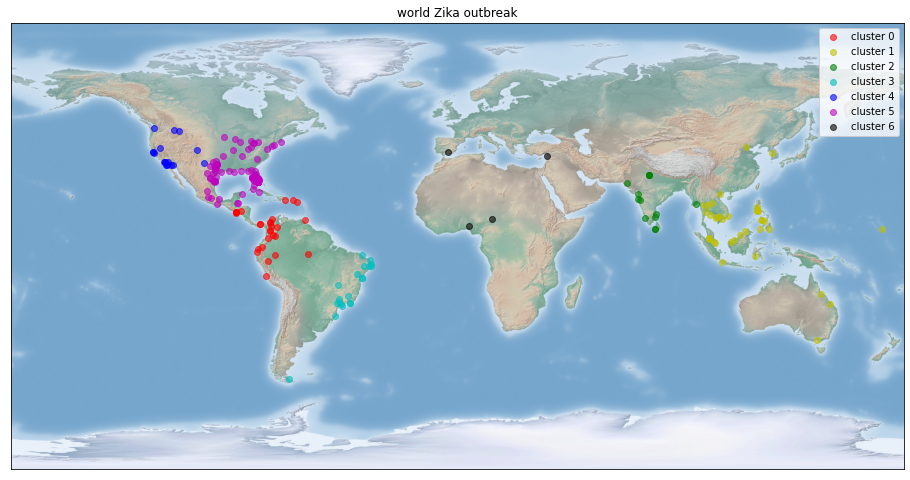

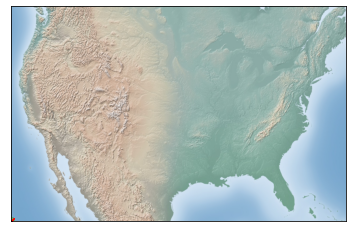

              count   longitude   latitude
kmeans_label                              
2                10  -74.238871  40.786156
3                 8  -84.965486  40.256574
1                 5 -118.806044  34.619832
4                 5 -103.151216  42.084210
0                 3  -93.635563  35.993963


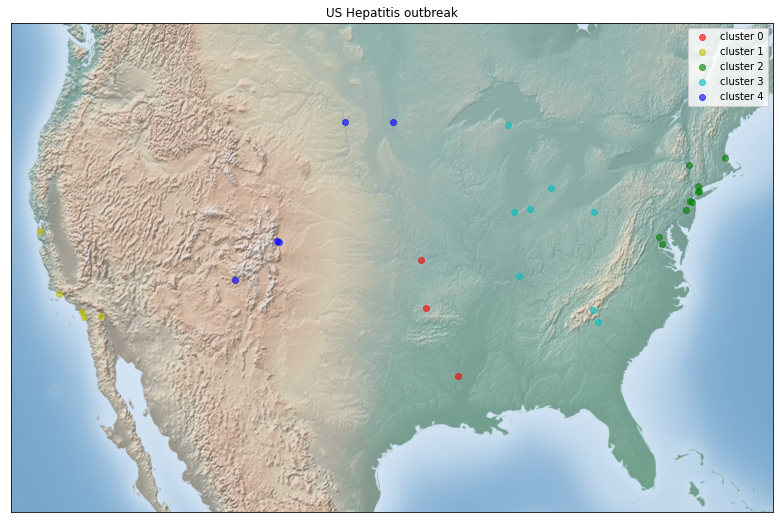

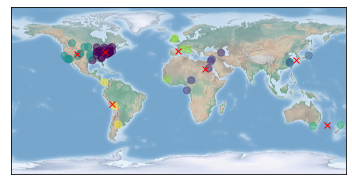

              count   longitude   latitude
kmeans_label                              
0                23  -79.039864  41.076587
3                13 -108.666075  39.234069
1                 6   29.058115  23.571198
5                 5   -0.534764  42.666152
2                 3  126.878910  32.645120
6                 3  -70.605477 -14.675760
4                 2  159.863405 -37.331265


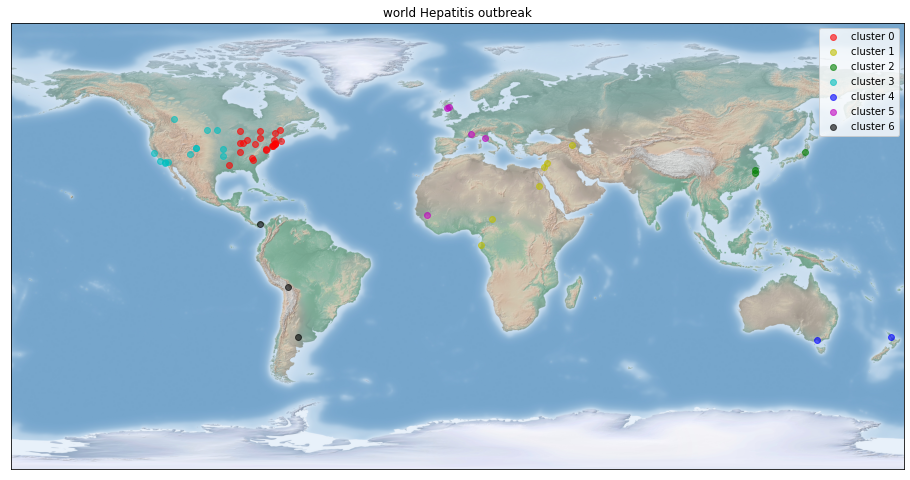

In [8]:
def main():
    # make necessary directories and create needed dataframe
    os.makedirs(data_path, exist_ok=True)
    df_world = pd.read_csv(f'{data_path}/match_data.csv').drop(["country", "city"], axis=1)
    df_us = df_world[df_world["countrycode"] == "US"]

    # Runs the k-means algorithm to add the cluster labels
    # elbow_curve(df_us[log_lat_col_name])
    num_us_cluster = 5
    num_world_cluster = 7
    df_us[kmlb_str] = kmeans_label_calcu(df_us[log_lat_col_name], num_us_cluster, Scope.US)
    df_world[kmlb_str] = kmeans_label_calcu(df_world[log_lat_col_name], num_world_cluster, Scope.world)

    # Computes the number of headlines in each k-means cluster and sort the clusters according to its headline number
    us_cluster_info = df_us.groupby(kmlb_str).agg({
        "countrycode": lambda x: x.count(),
        long_str: lambda x: x.mean(),
        lat_str: lambda x: x.mean()
    }).sort_values(by="countrycode", ascending=False).rename(columns={"countrycode": "count"})
    world_cluster_info = df_world.groupby(kmlb_str).agg({
        "countrycode": lambda x: x.count(),
        long_str: lambda x: x.mean(),
        lat_str: lambda x: x.mean()
    }).sort_values(by="countrycode", ascending=False).rename(columns={"countrycode": "count"})
    # calculate the distance between the spot and its cluster center
    df_us["distance"] = [haversine([df_us.loc[index, long_str], df_us.loc[index, lat_str]],
                                   [us_cluster_info.loc[df_us.loc[index, kmlb_str], long_str],
                                    us_cluster_info.loc[df_us.loc[index, kmlb_str], lat_str]]) for index in
                         df_us.index]
    df_world["distance"] = [haversine([df_world.loc[index, long_str], df_world.loc[index, lat_str]],
                                      [world_cluster_info.loc[df_world.loc[index, kmlb_str], long_str],
                                       world_cluster_info.loc[df_world.loc[index, kmlb_str], lat_str]]) for index in
                            df_world.index]
    # sort the headlines in the clusters according to its distance from the cluster center
    us_sorted_df_list = []
    for index in us_cluster_info.index:
        us_sorted_df_list.append(df_us[df_us[kmlb_str] == index].sort_values(by='distance').reset_index(drop=True))
    world_sorted_df_list = []
    for index in world_cluster_info.index:
        world_sorted_df_list.append(
            df_world[df_world[kmlb_str] == index].sort_values(by='distance').reset_index(drop=True))
    # # examine the DataFrame structure
    # print(df_us.info())
    # print(df_world.info())

    # # Print all headlines to find repeating disease
    # for one_df in us_sorted_df_list:
    #     print("\nUS cluster label = {}".format(one_df["kmeans_label"][0]))
    #     for i in one_df.index:
    #         print(one_df.loc[i, "headline"])
    # for one_df in world_sorted_df_list:
    #     print("\nworld cluster label = {}".format(one_df["kmeans_label"][0]))
    #     for i in one_df.index:
    #         print(one_df.loc[i, "headline"])

    # plot the repeating disease on a geographical map
    viruses = ["Zika", "Hepatitis"]
    for virus in viruses:
        df_us_virus = search_dataframe(df_us, virus)
        df_us_virus[kmlb_str] = kmeans_label_calcu(df_us_virus[log_lat_col_name], num_us_cluster, Scope.US)
        us_virus_cluster_info = df_us_virus.groupby(kmlb_str).agg({
            "headline": lambda x: x.count(),
            long_str: lambda x: x.mean(),
            lat_str: lambda x: x.mean()
        }).sort_values(by="headline", ascending=False).rename(columns={"headline": "count"})
        # see particular number of each cluster
        print(us_virus_cluster_info)
        plot_clusters(df_us_virus, num_us_cluster, Scope.US, f"US {virus} outbreak")
        df_us_virus.to_csv(f'{data_path}\\{virus}_disease_outbreak_us.csv', index=False)

        df_world_virus = search_dataframe(df_world, virus)
        df_world_virus[kmlb_str] = kmeans_label_calcu(df_world_virus[log_lat_col_name], num_world_cluster, Scope.world)
        world_virus_cluster_info = df_world_virus.groupby(kmlb_str).agg({
            "headline": lambda x: x.count(),
            long_str: lambda x: x.mean(),
            lat_str: lambda x: x.mean()
        }).sort_values(by="headline", ascending=False).rename(columns={"headline": "count"})
        # see particular number of each cluster
        print(world_virus_cluster_info)
        plot_clusters(df_world_virus, num_world_cluster, Scope.world, f"world {virus} outbreak")
        df_world_virus.to_csv(f"{data_path}\\{virus}_disease_outbreak_world.csv", index=False)


if __name__ == "__main__":
    main()